Authors:
<br />
Arsh Lalani, Faculty of Engineering, Western University 
<br />
Andrew Harrop, Faculty of Engineering, Western University

External Libraries:

In [5]:
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import VGG16, preprocess_input
import cv2
import numpy as np
import imutils

Internal Libraries:

In [8]:
# Internal libraries:
from load_images import load_images



from plotting import plot_image_classes
from plotting import plot_cnn_history
from plotting import plot_image


from Models.VGG16 import build_cnn
from Models.VGG16 import train_cnn


Load images from the dataset

In [14]:
dataset_1_tumor_images, dataset_1_normal_images = load_images(1)
dataset_2_tumor_images, dataset_2_normal_images = load_images(2)

Plot random images:

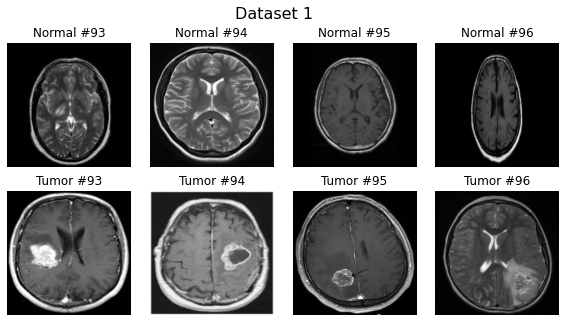

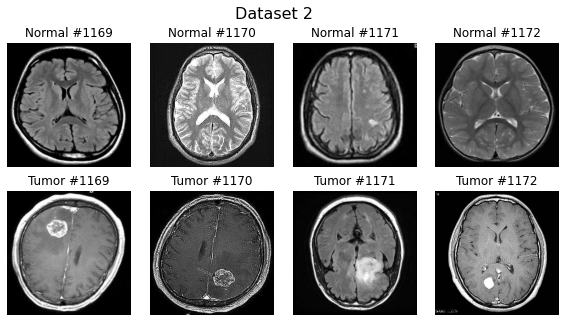

In [15]:
plot_image_classes(dataset_1_normal_images, dataset_1_tumor_images, n_images=4, title="Dataset 1")
plot_image_classes(dataset_2_normal_images, dataset_2_tumor_images, n_images=4, title="Dataset 2")

Crop the brain into the full view

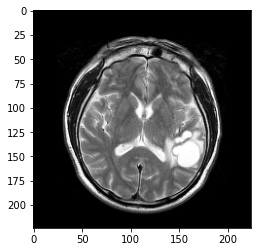

/var/folders/cn/b7hd5xd92dx4l2mj48c08x440000gn/T/ipykernel_47548/3347000553.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(set_new)


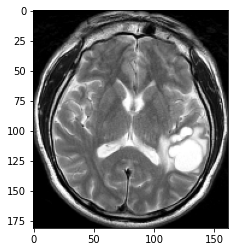

In [16]:
def crop_imgs(set_name, add_pixels_value=0):
    """
    Finds the extreme points on the image and crops the rectangular out of them
    """
    set_new = []
    for img in set_name:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        gray = cv2.GaussianBlur(gray, (5, 5), 0)

        # threshold the image, then perform a series of erosions +
        # dilations to remove any small regions of noise
        thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
        thresh = cv2.erode(thresh, None, iterations=2)
        thresh = cv2.dilate(thresh, None, iterations=2)

        # find contours in thresholded image, then grab the largest one
        cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        c = max(cnts, key=cv2.contourArea)

        # find the extreme points
        extLeft = tuple(c[c[:, :, 0].argmin()][0])
        extRight = tuple(c[c[:, :, 0].argmax()][0])
        extTop = tuple(c[c[:, :, 1].argmin()][0])
        extBot = tuple(c[c[:, :, 1].argmax()][0])

        ADD_PIXELS = add_pixels_value
        new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
        set_new.append(new_img)

    return np.array(set_new)


plot_image(dataset_1_tumor_images[4])
dataset_1_tumor_images_proc = crop_imgs(dataset_1_tumor_images)
dataset_1_normal_images_proc = crop_imgs(dataset_1_normal_images)
dataset_2_tumor_image_proc = crop_imgs(dataset_2_tumor_images)
dataset_2_normal_images_proc = crop_imgs(dataset_2_normal_images)
plot_image(dataset_1_tumor_images_cropped[4])

In [ ]:
def preprocess_imgs(set_name, img_size):
    """
    Resize and apply VGG-15 preprocessing
    """
    set_new = []
    for img in set_name:
        img = cv2.resize(
            img,
            dsize=img_size,
            interpolation=cv2.INTER_CUBIC
        )
        set_new.append(preprocess_input(img))
    return np.array(set_new)

    

Split the datasets

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.9, random_state=42, stratify=Y)

Basic CNN Model creation

In [8]:
base_cnn = build_cnn()
base_cnn_history, base_cnn_accuracy = train_cnn(base_cnn, X_train, Y_train, X_test, Y_test, epochs=50)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

/Users/andrew/Desktop/School/CS4442/Final/CodingEnv/Advanced-AI-Thesis/Models/base_cnn.py:78: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator.flow(train_X, train_Y, batch_size=batch_size),


3/3 [==============================] - 67s 30s/step - loss: 44.3814 - accuracy: 0.5294 - val_loss: 1.0990 - val_accuracy: 0.3860
Epoch 2/50
3/3 [==============================] - 18s 6s/step - loss: 1.1920 - accuracy: 0.5000
Epoch 3/50
3/3 [==============================] - 17s 6s/step - loss: 1.1073 - accuracy: 0.5417
Epoch 4/50
3/3 [==============================] - 13s 3s/step - loss: 0.8814 - accuracy: 0.4118
Epoch 5/50
3/3 [==============================] - 13s 3s/step - loss: 0.8225 - accuracy: 0.3529
Epoch 6/50
3/3 [==============================] - 12s 3s/step - loss: 0.6958 - accuracy: 0.5882
Epoch 7/50
3/3 [==============================] - 17s 6s/step - loss: 0.7630 - accuracy: 0.6250
Epoch 8/50
3/3 [==============================] - 17s 6s/step - loss: 0.7334 - accuracy: 0.4583
Epoch 9/50
3/3 [==============================] - 12s 3s/step - loss: 0.6921 - accuracy: 0.5882
Epoch 10/50
3/3 [==============================] - 12s 6s/step - loss: 0.8520 - accuracy: 0.6471
Epoch 

/Users/andrew/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/andrew/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/andrew/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

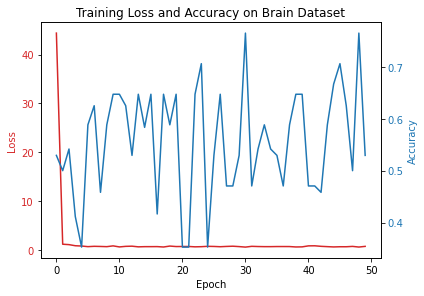

In [9]:
plot_cnn_history(base_cnn_history)